In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('employee.csv')
data=data.loc[:199,:]
print(data.shape)

(200, 35)


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
x=data['Attrition'].value_counts()
x

Attrition
No     170
Yes     30
Name: count, dtype: int64

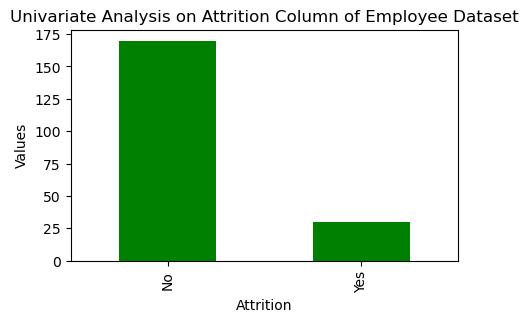

In [5]:
# lets use the the values in x to plot 

plt.rcParams['figure.figsize'] = (5, 3)
x.plot(kind = 'bar', color ='green')

plt.title('Univariate Analysis on Attrition Column of Employee Dataset', fontsize = 12)
plt.xlabel('Attrition')
plt.ylabel('Values')
plt.show()

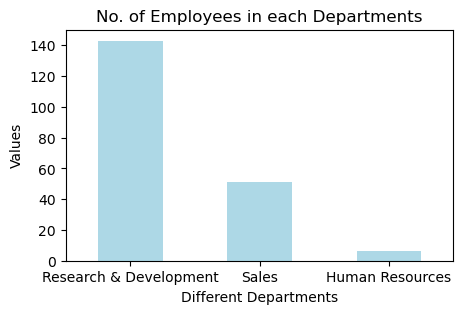

In [6]:
# analyzing the attribute Department

data['Department'].value_counts().plot(kind = 'bar', color = 'lightblue')
plt.ylabel('Values')
plt.xlabel('Different Departments')
plt.xticks(rotation = 360)
plt.title('No. of Employees in each Departments', fontsize =12)
plt.show()

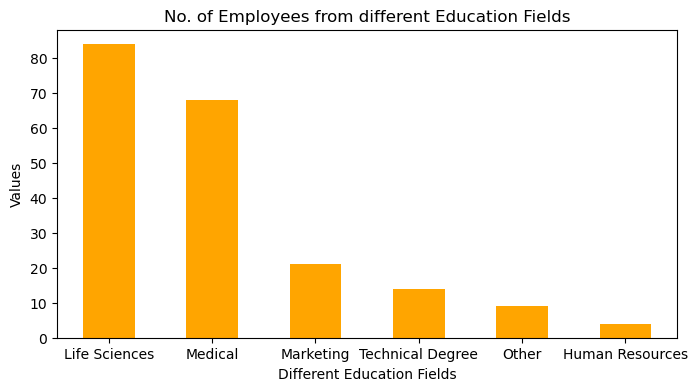

In [7]:
# analyzing the Education Field

plt.rcParams['figure.figsize'] = (8, 4)
data['EducationField'].value_counts().plot(kind = 'bar', color = 'orange')
plt.ylabel('Values')
plt.xlabel('Different Education Fields')
plt.xticks(rotation = 360)
plt.title('No. of Employees from different Education Fields', fontsize =12)
plt.show()

In [13]:
data.groupby('EducationField')['MonthlyRate'].sum()

EducationField
Human Resources       73423
Life Sciences       1168553
Marketing            307565
Medical              920432
Other                119762
Technical Degree     192304
Name: MonthlyRate, dtype: int64

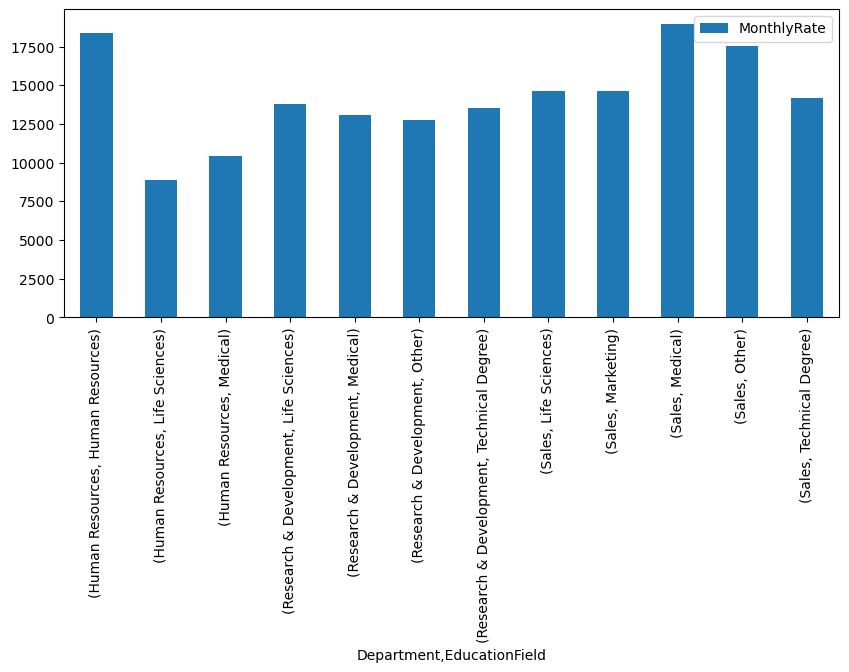

In [20]:
plt.rcParams['figure.figsize']=(10,4)
x=data.pivot_table(index=['Department','EducationField'],values=['MonthlyRate'],aggfunc='mean')
x.plot(kind='bar',stacked=False)
plt.xticks(rotation=90)
plt.show()

In [21]:
data.groupby(['Department',"EducationField"])["MonthlyRate"].mean()

Department              EducationField  
Human Resources         Human Resources     18355.750000
                        Life Sciences        8916.000000
                        Medical             10425.000000
Research & Development  Life Sciences       13771.687500
                        Medical             13053.540984
                        Other               12780.375000
                        Technical Degree    13551.000000
Sales                   Life Sciences       14644.684211
                        Marketing           14645.952381
                        Medical             18956.833333
                        Other               17519.000000
                        Technical Degree    14198.500000
Name: MonthlyRate, dtype: float64

In [22]:
x=pd.crosstab(index=data['Department'],
              columns=data['EducationField'],
              values=data['MonthlyRate'],
              aggfunc='mean')
x

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,18355.75,8916.000000,NaN,10425.000000,NaN,NaN
Research & Development,NaN,13771.687500,NaN,13053.540984,12780.375,13551.0
Sales,NaN,14644.684211,14645.952381,18956.833333,17519.000,14198.5


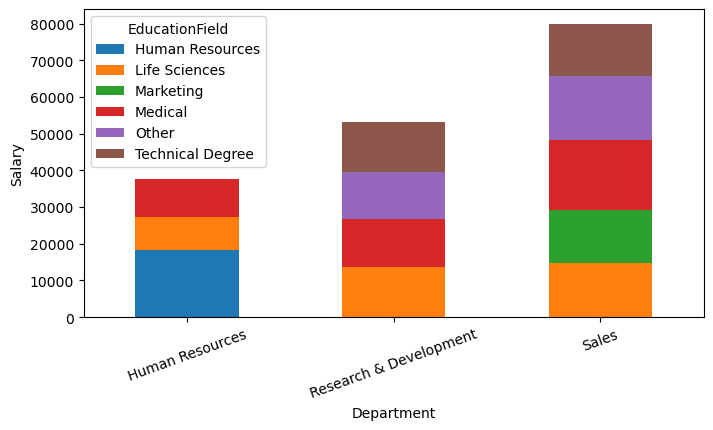

In [23]:
plt.rcParams['figure.figsize']=(8,4)
x.plot(kind='bar',stacked=True)
plt.ylabel('Salary')
plt.xticks(rotation=20)
plt.show()

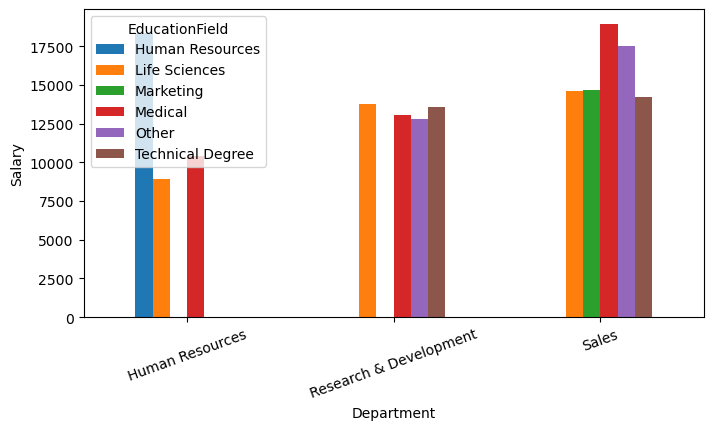

In [24]:
plt.rcParams['figure.figsize']=(8,4)
x.plot(kind='bar',stacked=False)
plt.ylabel('Salary')
plt.xticks(rotation=20)
plt.show()
